Read network from a GML File

In [1]:
import networkx as nx


def readNet(fileName):
    Graph = nx.read_gml(fileName)

    net = {}
    n = len(Graph.nodes())
    net['noNodes'] = n
    mat = nx.to_numpy_array(Graph, dtype=int).tolist()
    net["mat"] = mat
    degrees = [val for (node, val) in Graph.degree()]
    net["degrees"] = degrees
    noEdges = Graph.number_of_edges()
    net["noEdges"] = noEdges

    return Graph, net

Read communities label

In [2]:
def readCommunities(fileName):
    node_community1 = {}
    with open(fileName, 'r') as f:
        for line in f:
            parts = line.strip().split()  # Sau .split(',') dacă separatorul este virgulă
            node = parts[0]
            community = int(parts[1])
            node_community1[node] = community
    return node_community1

Load dolphins network

In [3]:
# load a network
import os

crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'communityDetection', 'data', 'dolphins', 'dolphins.gml')
G, network_details = readNet(filePath)

# print(G)
print(network_details)

# load labels
# nod_id, community_id
filePath = os.path.join(crtDir, 'communityDetection', 'data', 'dolphins', 'classLabeldolphins.txt')
communities = readCommunities(filePath)


{'noNodes': 62, 'mat': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

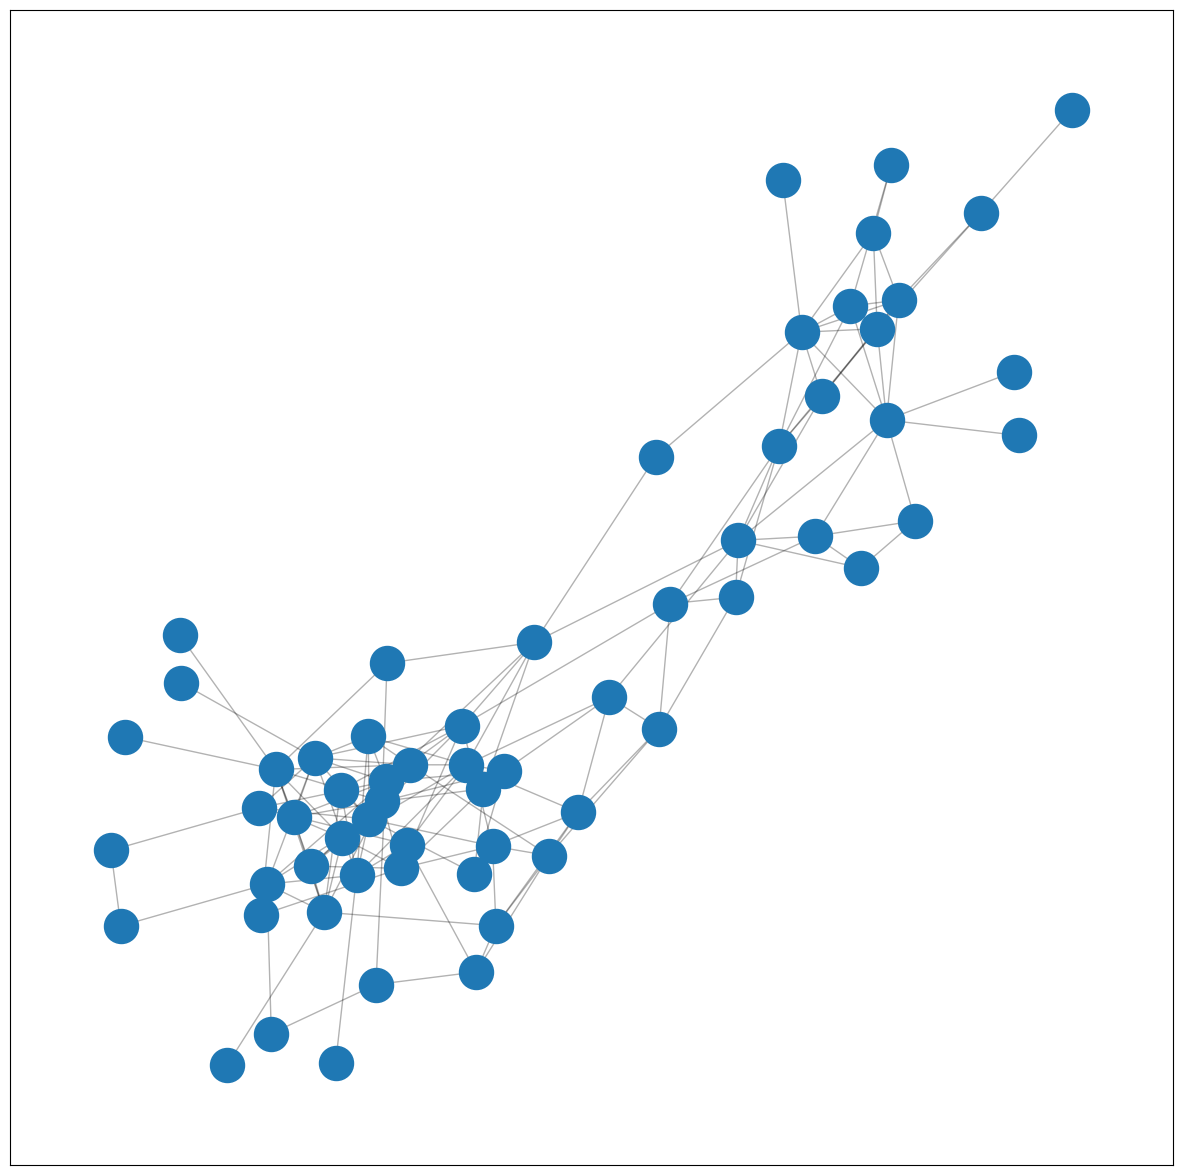

In [7]:
# plot the network 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

A = np.matrix(network_details["mat"])
G1 = nx.from_numpy_array(A)
pos = nx.spring_layout(G1)  # compute graph layout
plt.figure(figsize=(15, 15))  # image is 8 x 8 inches 
nx.draw_networkx_nodes(G1, pos, node_size=600, cmap=plt.cm.RdYlBu)
nx.draw_networkx_edges(G1, pos, alpha=0.3)
plt.show(G1)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not {'1': 1, '2': 2, '3': 1, '4': 1, '5': 1, '6': 2, '7': 2, '8': 2, '9': 1, '10': 2, '11': 1, '12': 1, '13': 1, '14': 2, '15': 1, '16': 1, '17': 1, '18': 2, '19': 1, '20': 2, '21': 1, '22': 1, '23': 2, '24': 1, '25': 1, '26': 2, '27': 2, '28': 2, '29': 1, '30': 1, '31': 1, '32': 2, '33': 2, '34': 1, '35': 1, '36': 1, '37': 1, '38': 1, '39': 1, '40': 1, '41': 1, '42': 2, '43': 1, '44': 1, '45': 1, '46': 1, '47': 1, '48': 1, '49': 2, '50': 1, '51': 1, '52': 1, '53': 1, '54': 1, '55': 2, '56': 1, '57': 2, '58': 2, '59': 1, '60': 1, '61': 2, '62': 1}

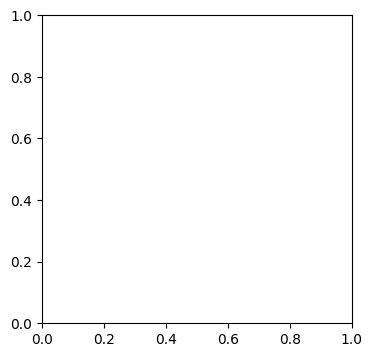

In [8]:
# plot a particular division in communities

A = np.matrix(network_details["mat"])
G2 = nx.from_numpy_array(A)
pos = nx.spring_layout(G2)  # compute graph layout
plt.figure(figsize=(4, 4))  # image is 8 x 8 inches 
nx.draw_networkx_nodes(G2, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=communities)
nx.draw_networkx_edges(G2, pos, alpha=0.3)
plt.show(G2)

In [9]:
from networkx.algorithms.community import modularity


def calculate_modularity(Gra, node_community2):
    from collections import defaultdict
    communities1 = defaultdict(list)
    for node, community in node_community2.items():
        communities1[community].append(node)
    community_list = [set(nodes) for nodes in communities1.values()]
    mod = modularity(Gra, community_list)
    return mod, len(community_list), node_community2

In [10]:
mod, num_communities, node_community = calculate_modularity(G, communities)

print("Numărul de noduri:", network_details['noNodes'])
print("Numărul de muchii:", network_details['noEdges'])
print("Gradele nodurilor:", network_details['degrees'])
print("Matricea de adiacență:")
for row in network_details['mat']:
    print(row)
print(f"Modularitatea comunităților este: {mod}")
print(f"Numărul de comunități identificate: {num_communities}")

NotAPartition: [{'4', '15', '35', '31', '52', '24', '36', '37', '21', '30', '25', '40', '38', '16', '13', '3', '12', '47', '56', '1', '19', '53', '44', '59', '60', '43', '17', '45', '34', '46', '50', '11', '22', '39', '9', '41', '48', '51', '29', '54', '5', '62'}, {'58', '49', '23', '8', '55', '6', '57', '2', '20', '10', '32', '42', '61', '18', '7', '33', '28', '14', '27', '26'}] is not a valid partition of the graph Graph with 62 nodes and 159 edges